In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
data = pd.read_csv("Data/prediction_data.csv")
print(data.head())

  customer_id  gender  age married           state  number_of_referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12       none           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [3]:
data.columns

Index(['customer_id', 'gender', 'age', 'married', 'state',
       'number_of_referrals', 'tenure_in_months', 'value_deal',
       'phone_service', 'multiple_lines', 'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

Confusion Matrix:
[[775  72]
 [130 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       847
           1       0.76      0.63      0.69       355

    accuracy                           0.83      1202
   macro avg       0.81      0.77      0.79      1202
weighted avg       0.83      0.83      0.83      1202



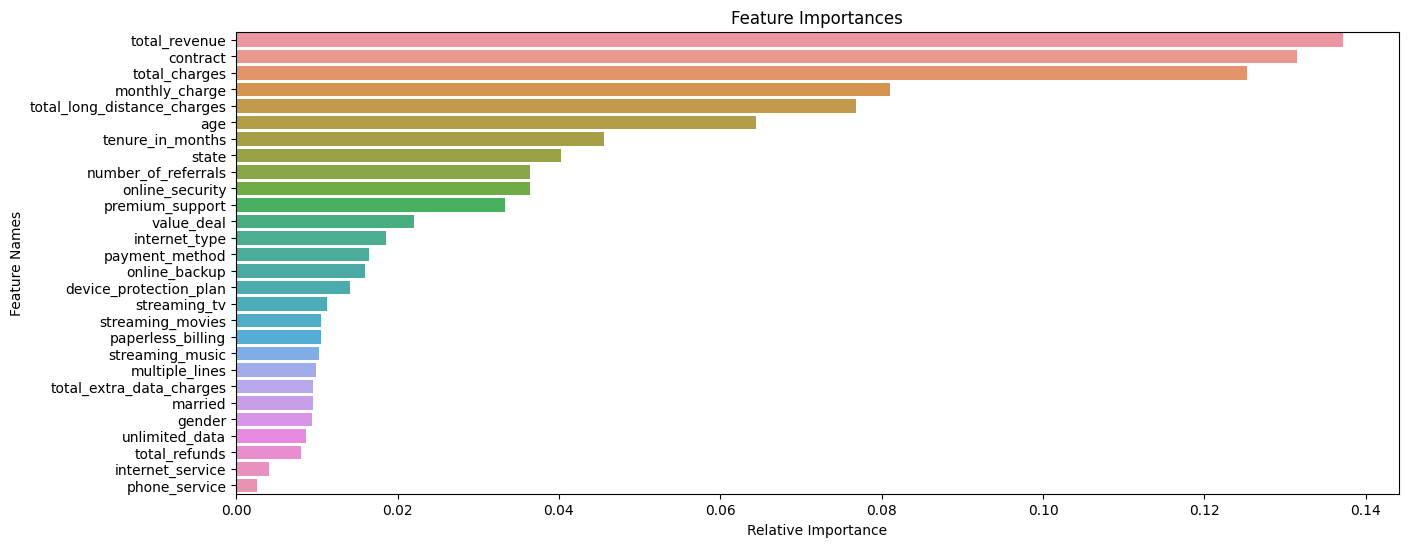

In [4]:
# Drop columns that won't be used for prediction
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('customer_status', axis=1)
y = data['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [5]:
# Reading the data from the specified sheet into a pandas DataFrame
new_data = pd.read_csv("Data/view_joined.csv")

# Displaying the first few rows of the fetched data
print(new_data.head())

# Retaining the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retaining the Customer_ID column
customer_ids = new_data['customer_id']

# Droping columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Encoding categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Adding predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filtering the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

  customer_id  gender  age married        state  number_of_referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                 7     Deal 5            No             no  ...   
1                20       none           Yes             No  ...   
2                35       none           Yes             No  ...   
3                 1       none           Yes             No  ...   
4                10       none           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [6]:
# Saving the results
original_data.to_csv(r"Data/Predictions.csv", index=False)